# O efeito Doppler

- PET - Fisica UFRN
- Petiano: Gustavo C. A. Vilas Boas
- Data: 16/09/20

O objetivo deste projeto é demonstrar a ação do efeito Doppler, que é bem presente no cotidiano de todos, utilizando gráficos comparativos das ondas sonoras.

### Introdução teórica

O efeito Doppler, descrito pelo cientista Christian Doppler em meados do século XIX, consiste no efeito de distorção do som, causado pelo movimento relativo entre a fonte sonora e o ouvinte. Um exemplo cotidiano desse efeito é o da ambulância, que quando passa pelo ouvinte na rua, aparenta emitir sons diferentes quando se aproxima e quando se afasta.
Para explicar o fenômeno, tomaremos o caso particular no qual a fonte está em repouso e o ouvinte se move.

Uma fonte $s$ em repouso emite uma onda sonora em uma frequência $f_s$, porém o ouvinte, que se aproxima com velocidade $v_o$, percebe uma frequência diferente, $f_o$. O que acontece é que, por estar em movimento em relação à fonte, ele capta a onda com velocidade maior do que foram emitidas originalmente, a imagem seguinte demonstra bem.

![Figura 16.27](https://imgur.com/f9Fovp2.png)

As cristas da onda, representadas pelos círculos na imagem, viajam com velocidade $v$ em relação ao ambiente, mas em relação ao ouvinte elas estão viajando com uma velocidade $(v + v_o)$, como a frequência é calculada como $f = \dfrac{v}{\lambda}$ e $\lambda = \dfrac{v}{f_s}$, a frequência que o ouvinte percebe é $f_o = \dfrac{(v + v_o)}{v} f_s$.

Quando a fonte também está em movimento, o comprimento de onda emitido muda, pois como ele é a distância entre duas cristas sucessivas, a velocidade da fonte também influencia, $\lambda$ deixa de ser $\dfrac{v}{f_s}$ e passa a ser $\dfrac{(v + v_s)}{f_s}$.

![Figura 16.27](https://imgur.com/959vub3.png)

Como a frequência percebida pelo ouvinte é $f_o = \dfrac{(v + v_o)}{\lambda}$, com $\lambda$ mudando, $f_o$ também muda:
$f_o = \dfrac{(v + v_o)}{v + v_s} f_s$

### Importando bibliotecas

In [1]:
from numpy import  linspace, array, cos, pi
from pylab import plot, show, legend, title, xlabel, ylabel, xlim

### Definindo função da onda

Para fazer o gráfico das ondas, eu defini uma função $onda(A,f,t)$ para representar a onda sonora, recebendo uma amplitude $A$, uma frequência $f$ e um tempo $t$.
A fórmula utilizada para o cálculo é a $y(x,t) = A cos(kx - \omega t)$, porém como a onda será apenas um demonstrativo das diferentes frequências, considerei $x = 0$, e, tendo em mente que $\omega = 2 \pi f$, obtemos a fórmula $y(x,t) = A cos(2 \pi f t)$.

In [2]:
def onda(A, f, t):
    return A*cos(2*pi*f*t)

### Definindo parâmetros iniciais

In [3]:
t = linspace(0,10,10000) # Vetor para o tempo
ys = [] # Vetor para armazenar as posições no eixo y
A = 3*10**(-3) # Amplitude 
v = 340 # Velocidade do som no ar
fs = 40 # Frequência emitida

### Laço para desenhar a onda

Utilizei o $for$ para calcular a posição $y$ para cada tempo $t$ e armazenar no vetor $yf$.

In [4]:
for h in range(len(t)):
    y = onda(A,fs,t[h])
    ys.append(y)

### Plot da onda emitida pela fonte

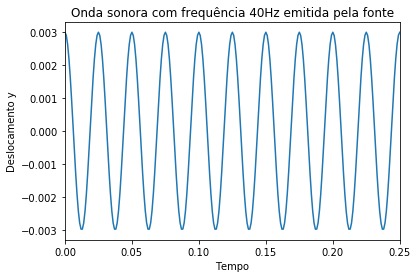

In [5]:
xlabel("Tempo")
ylabel("Deslocamento y")
title("Onda sonora com frequência 40Hz emitida pela fonte")
plot(t,ys)
xlim(0,0.25) #Limite imposto para ser possível visualizar a onda
show()

### Parâmetros do exemplo

Para exemplificar o efeito Doppler eu propus a seguinte situação:
Um ouvinte, partindo do ponto $x = 0$ e com velocidade $v_o = 30 m/s$, ultrapassa um carro de som, que está a 80 metros à frente e com velocidade $v_f = 10 m/s$. O carro de som está emitindo uma onda sonora de frequência 40Hz. Qual seria a frequência escutada pelo ouvinte enquanto ele se aproxima e qual seria a frequência depois da ultrapassagem? 

In [6]:
vo = 30 # Velocidade do ouvinte
vs = 10 # Velocidade da fonte
x = [] # Vetor para guardar a posição do ouvinte
xs0 = 80 # Posição inicial da fonte
f = [] # Vetor para guardar as frequências percebidas pelo ouvinte

### Laço para encontrar a frequência percebida pelo ouvinte

O sentido positivo da velocidade é o sentido ouvinte-fonte, então ao ultrapassar o carro de som, as velocidades se tornam negativas, pois o ouvinte estará se afastando e a fonte indo em direção ao ouvinte, ou seja, ambas as velocidades estarão no sentido oposto ao positivo.

In [7]:
for h in range(len(t)):
    xo = vo*t[h]
    xs = xs0 + vs*t[h]
    x.append(xo)
    if (xo-xs)<0:
        fo = fs*(v + vo)/(v + vs)
    else:
        fo = fs*(v - vo)/(v - vs)
    f.append(fo)

### Plotando os gráficos

Para título de comparação, dois gráficos serão feitos, um mostrando a frequência percebida para cada posição e outro comparando as três frequências, a emitida, percebida antes de ultrapassar e a percebida após ultrapassar.
Primeiro serão criados dois vetores com o mesmo propósito do vetor $y_s$, definidas as duas frequências e depois disso são feitos os laços para os gráficos das ondas.

In [8]:
yaprox = []
yafas = []

faprox = fs*(v + vo)/(v + vs)
fafas = fs*(v - vo)/(v - vs)

for h in range(len(t)):
    y = onda(A,faprox,t[h])
    yaprox.append(y)

for h in range(len(t)):
    y = onda(A,fafas,t[h])
    yafas.append(y)

E por fim, são plotados os gráficos.

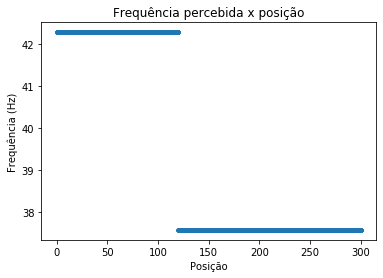

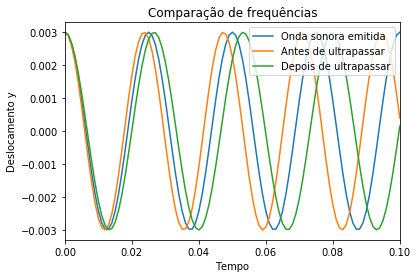

In [9]:
xlabel("Posição")
ylabel("Frequência (Hz)")
title("Frequência percebida x posição")
plot(x,f,".")
show()

title("Comparação de frequências")
xlabel("Tempo")
ylabel("Deslocamento y")
plot(t,ys,label="Onda sonora emitida")
plot(t,yaprox,label="Antes de ultrapassar")
plot(t,yafas,label="Depois de ultrapassar")
legend(loc='upper right')
xlim(0,0.1)
show()

### Conclusão

A frequência antes de ultrapassar, como esperado, é maior que após ultrapassar. E por conta desse efeito percebemos um som mais agudo e alto quando uma fonte se aproxima e um som mais grave e baixo quando ela se afasta.

### Referências

[1] YOUNG & FREEDMAN, Física II: Termodinâmica e Ondas, 14ª edição (2015). Imagens retiradas: Figura 16.27 e 16.28.